<a href="https://colab.research.google.com/github/sarkar2527/DSAP/blob/main/Wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#Importing the neccessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [3]:
# Read the Data
df = pd.read_csv("/content/drive/MyDrive/GeekLurn_ML_Session/wine_dataset.csv")

In [4]:
df.shape

(6497, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  style                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [6]:
df.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
style                   0
dtype: int64

In [7]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed_acidity,6497.0,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000
volatile_acidity,6497.0,0.339666,0.164636,0.08000,0.23000,0.29000,0.40000,1.58000
citric_acid,6497.0,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
residual_sugar,6497.0,5.443235,4.757804,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
free_sulfur_dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total_sulfur_dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6497.0,0.531268,0.148806,0.22000,0.43000,0.51000,0.60000,2.00000


In [9]:
df['style'].value_counts()

white    4898
red      1599
Name: style, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


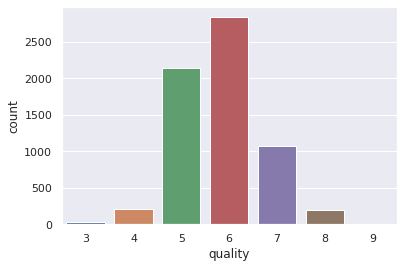

In [21]:
sns.countplot(df['quality'])

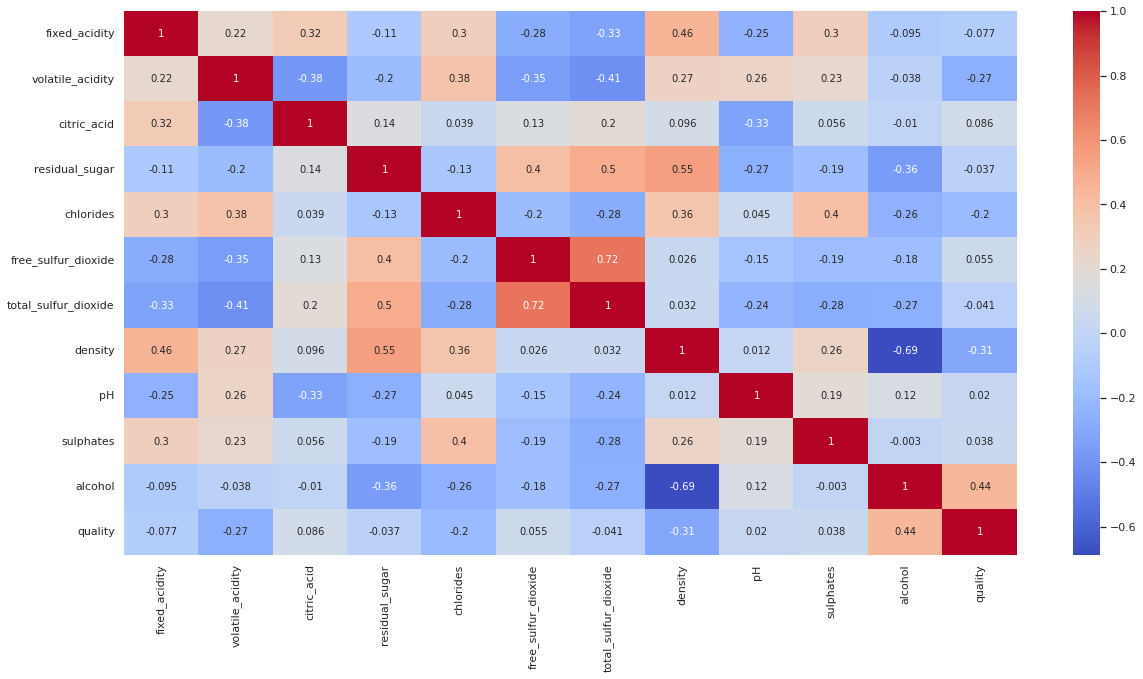

In [22]:
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

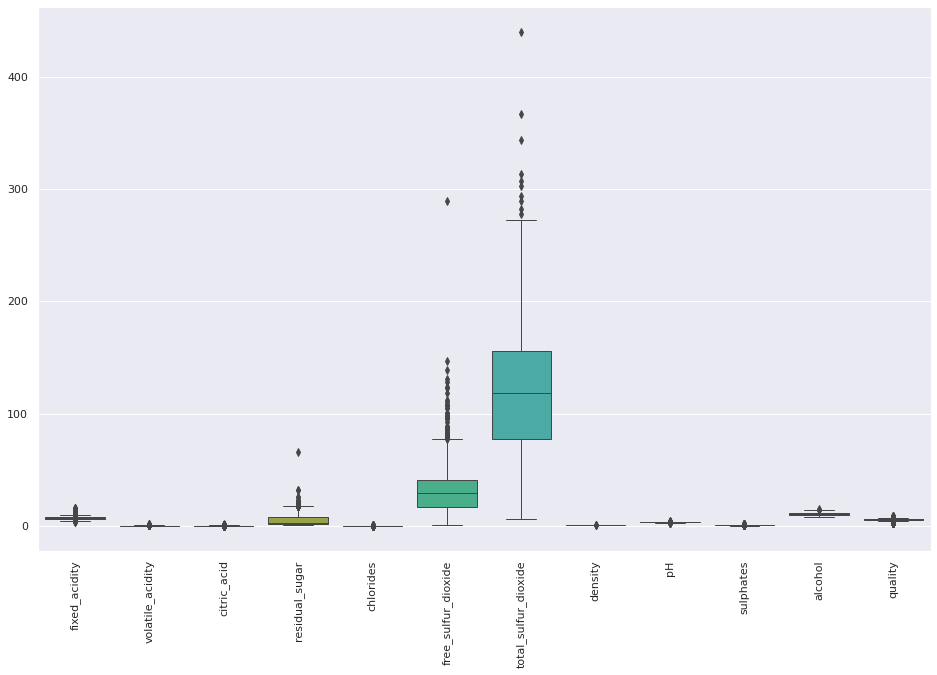

In [10]:
#Checking the outliers
fig = plt.figure(figsize =(16, 10))
sns.boxplot(data= df, linewidth=1)
plt.xticks(rotation='vertical')
plt.show()

In [11]:
def outliers (df , ft) :
    Q1= df[ft].quantile(0.25)
    Q3= df[ft].quantile(0.75)
    
    IQR = Q3-Q1
    
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    
    ls = df.index[(df[ft] < lower_bound )| (df[ft] > upper_bound )]
    
    return ls

In [12]:
def remove (df, ls ):
    ls = sorted(set(ls))
    df = df.drop(ls)
    
    return df

In [13]:
df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'style'],
      dtype='object')

In [14]:
index_list = []
for feature in ['fixed_acidity', 
                'volatile_acidity', 
                'citric_acid', 
                'residual_sugar',
                'chlorides', 
                'free_sulfur_dioxide', 
                'total_sulfur_dioxide', 
                'density',
                'pH', 
                'sulphates', 
                'alcohol', 
                'quality']:
      index_list.extend(outliers(df , feature))

In [15]:
df1 = remove(df,index_list)

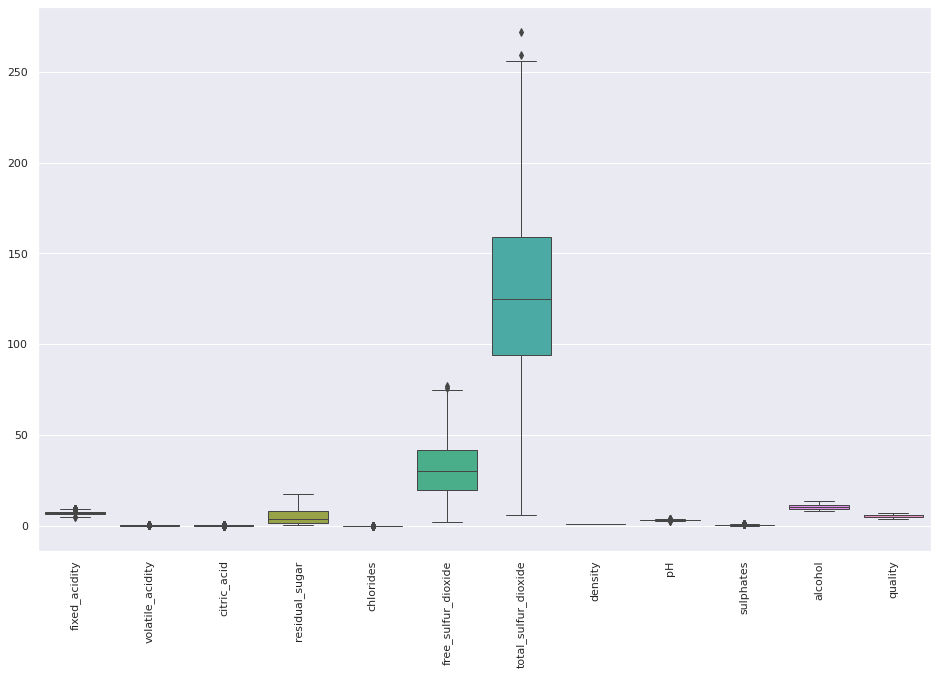

In [16]:
#Checking the outliers removal
fig = plt.figure(figsize =(16, 10))
sns.boxplot(data= df1, linewidth=1)
plt.xticks(rotation='vertical')
plt.show()

In [17]:
df.shape, df1.shape

((6497, 13), (4840, 13))

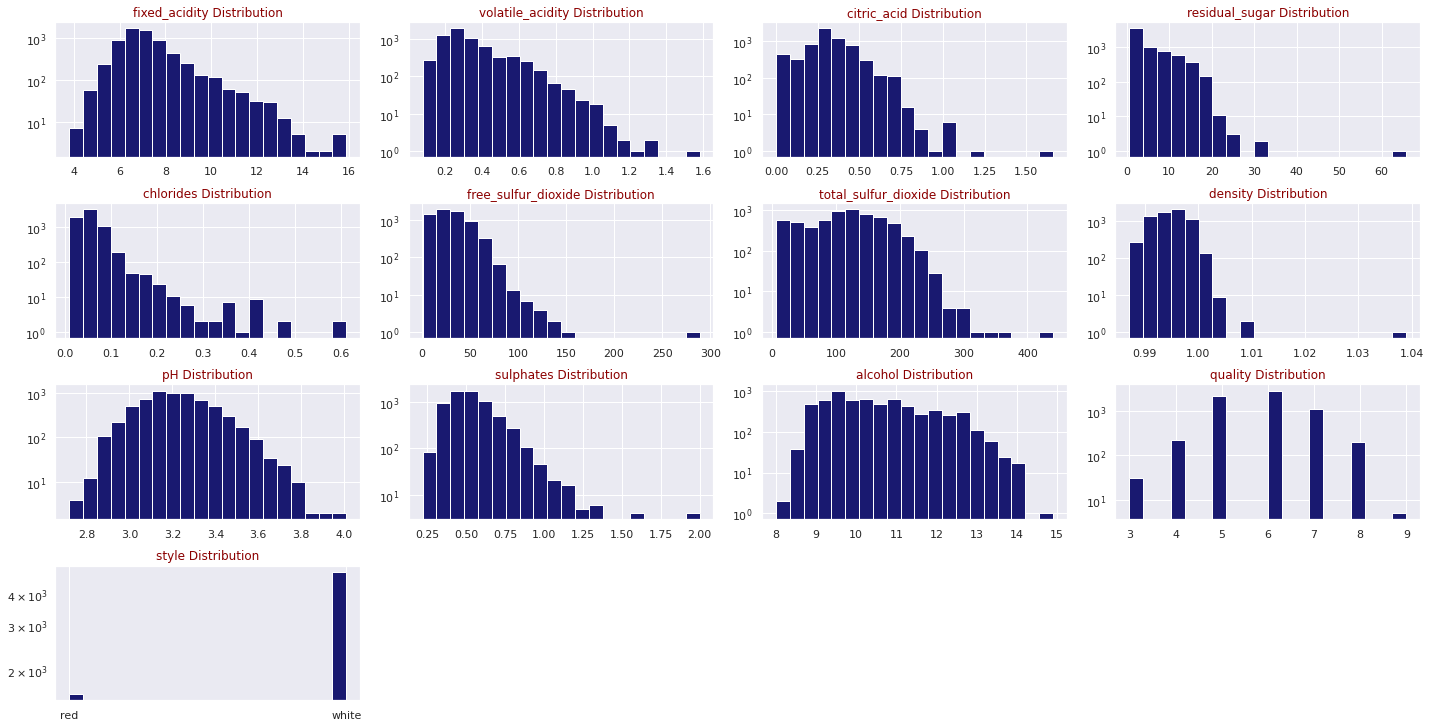

In [18]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        ax.set_yscale('log')
    fig.tight_layout()  
    plt.show()

draw_histograms(df,df.columns,8,4)

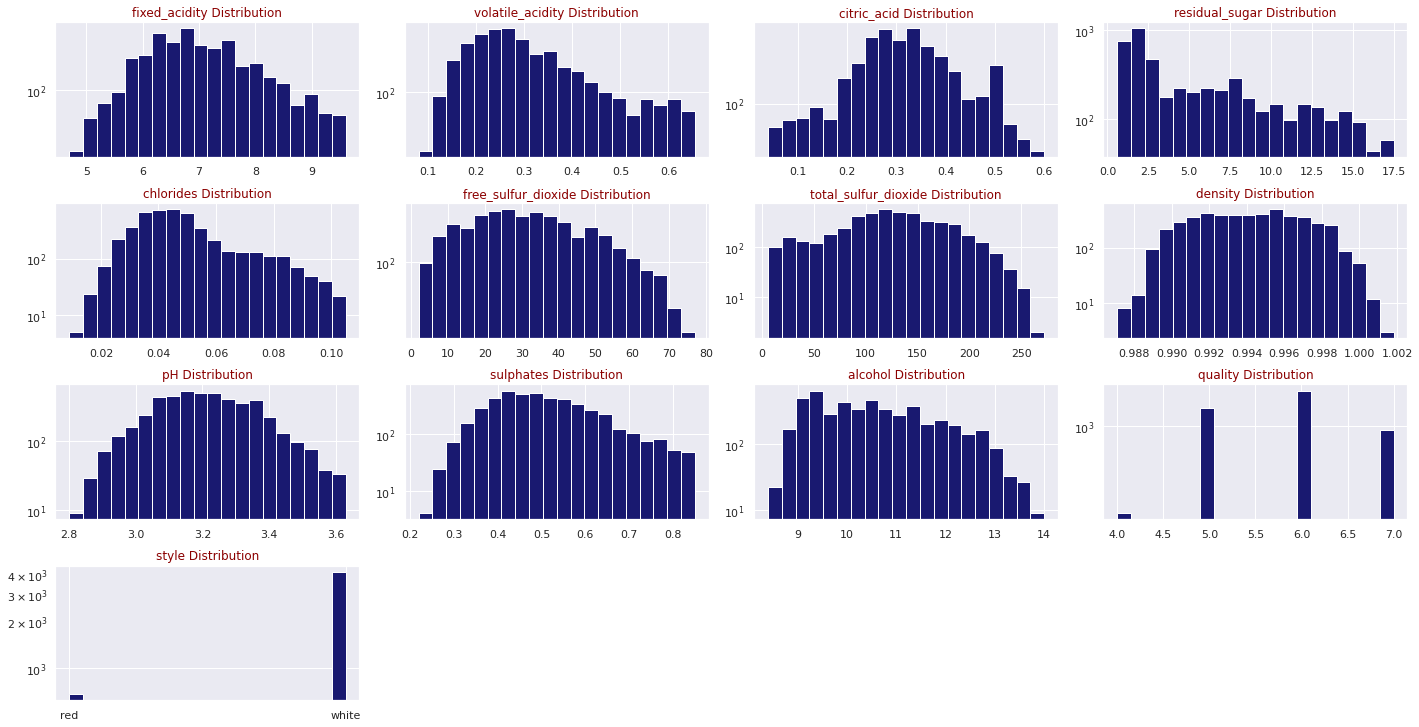

In [19]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        ax.set_yscale('log')
    fig.tight_layout()  
    plt.show()

draw_histograms(df1,df1.columns,8,4)

In [20]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed_acidity,4840.0,6.973895,0.879274,4.70000,6.40000,6.9000,7.500000,9.60000
volatile_acidity,4840.0,0.298889,0.115122,0.08000,0.22000,0.2800,0.350000,0.65500
citric_acid,4840.0,0.315785,0.101129,0.04000,0.26000,0.3100,0.370000,0.60000
residual_sugar,4840.0,5.558254,4.501241,0.60000,1.80000,3.8000,8.400000,17.50000
chlorides,4840.0,0.047748,0.016407,0.00900,0.03600,0.0450,0.054000,0.10500
free_sulfur_dioxide,4840.0,31.840186,15.647792,2.00000,20.00000,30.0000,42.000000,77.00000
total_sulfur_dioxide,4840.0,124.839050,50.170304,6.00000,94.00000,125.0000,159.000000,272.00000
density,4840.0,0.994185,0.002766,0.98711,0.99192,0.9942,0.996322,1.00182
pH,4840.0,3.210128,0.148046,2.80000,3.11000,3.2000,3.310000,3.63000
sulphates,4840.0,0.505802,0.115638,0.22000,0.42000,0.4900,0.580000,0.85000
